In [1]:
import sys
sys.path.append('/Users/benj/Documents/HiSPEC-analysis-2/')
import SEC_Class_working as sp
import os
import matplotlib.pyplot as plt
import SEC_Class_working as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


In [2]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/MnOxSpEC/2024-07-30/run2/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/MnOxSpEC/2024-07-30/run2/CV-3.3.0.0__0.csv


1
Fitted parameters saved to the interpolation attribute are:
        Amplitude:1.5017564185014964
        Period:600.1233717176103
        Phase: -1.3616101997493464 
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


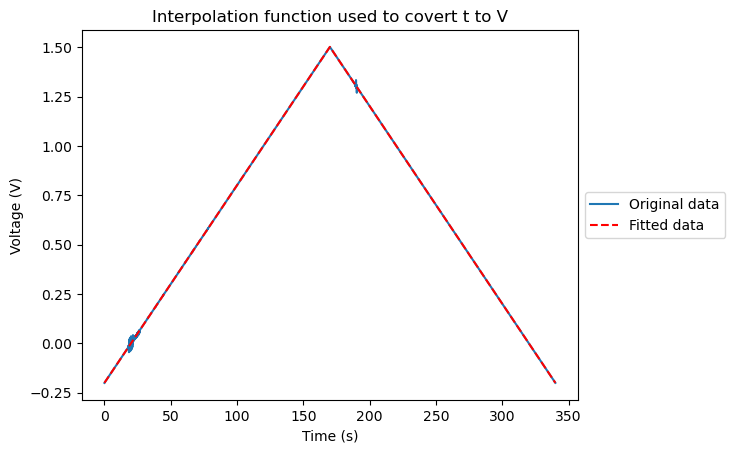

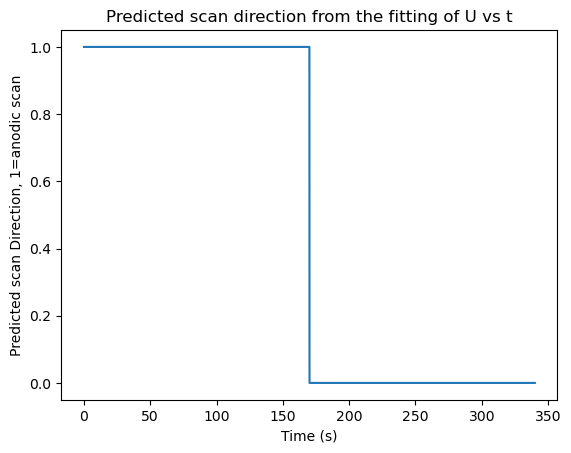

In [3]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()
SpEC1.Downsample_spec_scans(0.005, 1)
test, ref =sp.calculateDOD(SpEC1, 0, 'Cathodic', -1,11)

In [4]:
test=SpEC1.CV

(17001, 2)


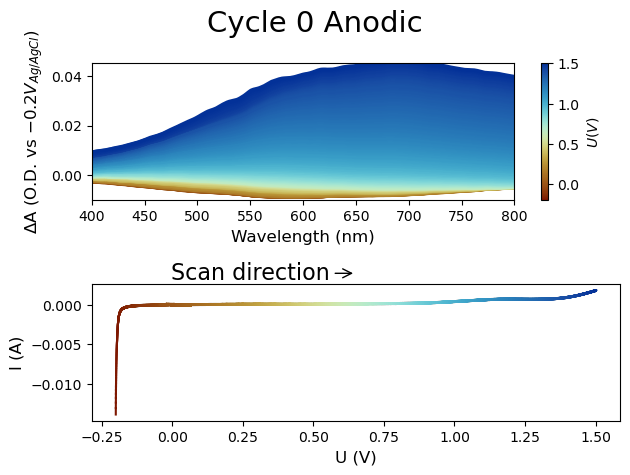

(17000, 2)


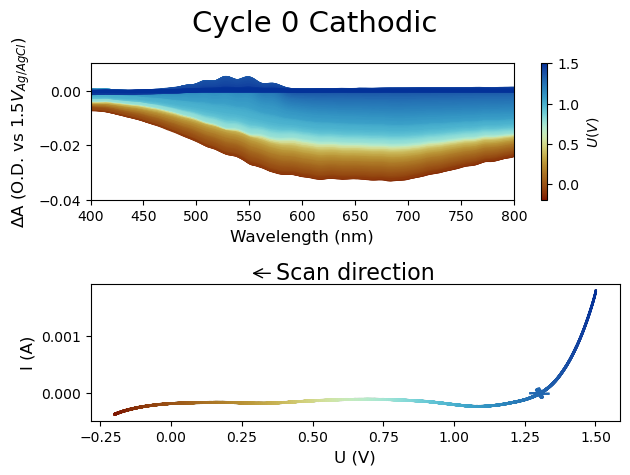

In [18]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 21)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.045, y_min=-0.01,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 1.5, 21)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.01, y_min=-0.04,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -0.2V_{Ag/AgCl}$)'>)

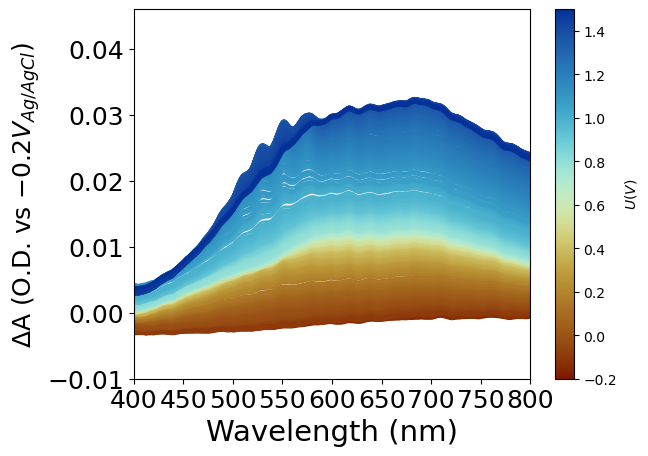

In [6]:
data, ref=sp.calculateDOD(SpEC1, 0, 'Cathodic', -0.2, 21)
sp.plot_DOD(data, y_max=0.046, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

In [7]:
data=sp.calculateDOD(SpEC1, 0, 'Anodic', -0.2, 21)[0]
data

Voltage (V),-0.200,-0.195,-0.190,-0.185,-0.180,-0.175,-0.170,-0.165,-0.160,-0.155,...,1.455,1.460,1.465,1.470,1.475,1.480,1.485,1.490,1.495,1.500
Wavelength (nm),,,,,,,,,,,,,,,,,,,,,
400,0.0,-0.000374,-0.000862,-0.001139,-0.001317,-0.001680,-0.001524,-0.001731,-0.001527,-0.001810,...,0.007810,0.008209,0.008195,0.008633,0.008370,0.008427,0.008768,0.008800,0.009375,0.009345
401,0.0,-0.000295,-0.000809,-0.001142,-0.001307,-0.001522,-0.001544,-0.001747,-0.001603,-0.001822,...,0.007893,0.008242,0.008279,0.008626,0.008432,0.008483,0.008789,0.008902,0.009492,0.009461
402,0.0,-0.000229,-0.000769,-0.001148,-0.001305,-0.001406,-0.001568,-0.001768,-0.001671,-0.001840,...,0.007968,0.008279,0.008353,0.008629,0.008497,0.008543,0.008818,0.008998,0.009589,0.009563
403,0.0,-0.000175,-0.000742,-0.001158,-0.001312,-0.001326,-0.001597,-0.001794,-0.001734,-0.001863,...,0.008035,0.008320,0.008421,0.008641,0.008564,0.008608,0.008855,0.009088,0.009667,0.009654
404,0.0,-0.000133,-0.000725,-0.001171,-0.001326,-0.001279,-0.001630,-0.001824,-0.001790,-0.001891,...,0.008096,0.008366,0.008483,0.008662,0.008632,0.008677,0.008900,0.009173,0.009731,0.009735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.001924,0.004627,0.004469,0.004162,0.003964,0.003649,0.003443,0.003240,0.003011,...,0.025247,0.025618,0.025868,0.026183,0.026483,0.026760,0.027066,0.027347,0.027761,0.028000
939,0.0,0.001924,0.004608,0.004439,0.004145,0.003970,0.003652,0.003438,0.003224,0.003011,...,0.025124,0.025514,0.025754,0.026085,0.026381,0.026641,0.026966,0.027239,0.027667,0.027871
940,0.0,0.001927,0.004580,0.004395,0.004122,0.003975,0.003652,0.003426,0.003203,0.003006,...,0.024983,0.025396,0.025625,0.025977,0.026268,0.026504,0.026855,0.027123,0.027563,0.027722


(-0.0002, 0.002)

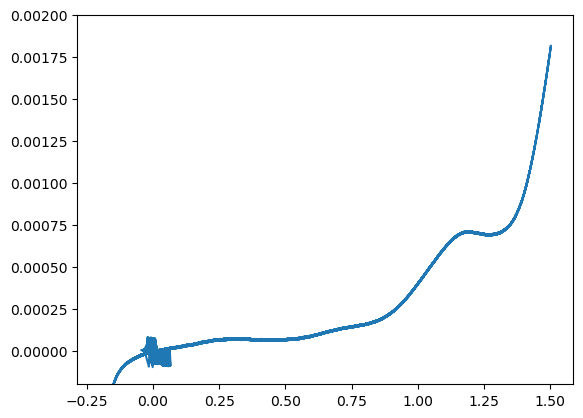

In [8]:
test=SpEC1.CV_scans[0]['Anodic']

# plot the fist and second collumns of test

plt.plot(test.iloc[:,1], test.iloc[:,2])
# set the y range from -0.0001 to 0.002
plt.ylim(-0.0002, 0.002)
#

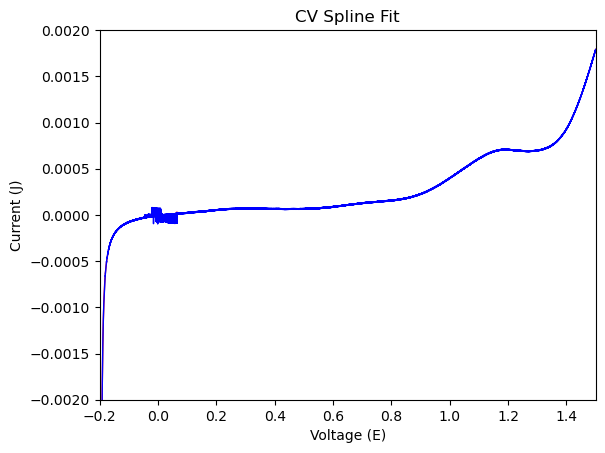

array(2.615761e-05)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Extract current and voltage data from the DataFrame
J = test.iloc[:, 2]
E = test.iloc[:, 1]

# Sort the data by voltage
sorted_indices = np.argsort(E)
E_sorted = E.iloc[sorted_indices]
J_sorted = J.iloc[sorted_indices]

# Fit the CV to a spline function
spl = UnivariateSpline(E_sorted, J_sorted)
spl.set_smoothing_factor(0.000001)

# Plot the spline function
plt.plot(E_sorted, spl(E_sorted), 'r', lw=1)

# Plot the original data
plt.plot(E_sorted, J_sorted, 'b', lw=1) 
plt.xlabel('Voltage (E)')
plt.ylabel('Current (J)')
plt.title('CV Spline Fit')
# set the x range from -0.2 to 1.5
plt.xlim(-0.2, 1.5)

# set the y range from -0.002 to 0.002
plt.ylim(-0.002, 0.002)

plt.show()

# use the spline function to calculate the current at a specific voltage
spl(0.)





In [10]:
sorted_indices

0            0
1            1
2            2
3            3
4            4
         ...  
16996    16996
16997    16997
16998    16998
16999    16999
17000    17000
Name: Ewe_V, Length: 17001, dtype: int64

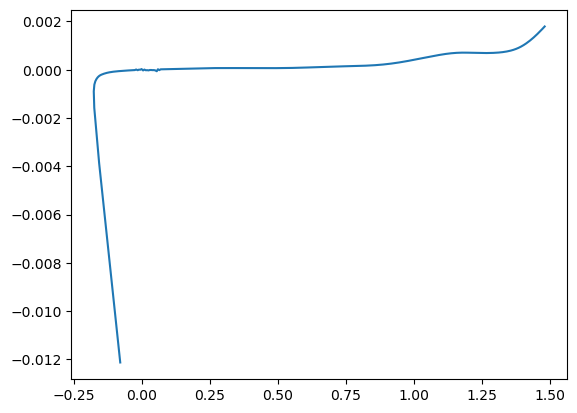

In [11]:
Spectral_voltages=data.columns.values
Spectral_currents=spl(Spectral_voltages)

Cell_resistance=10 # ohms

iR=Cell_resistance*Spectral_currents

Spectral_voltages_corrected=Spectral_voltages-iR

plt.plot(Spectral_voltages_corrected, Spectral_currents)



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -0.2V_{Ag/AgCl}$)'>)

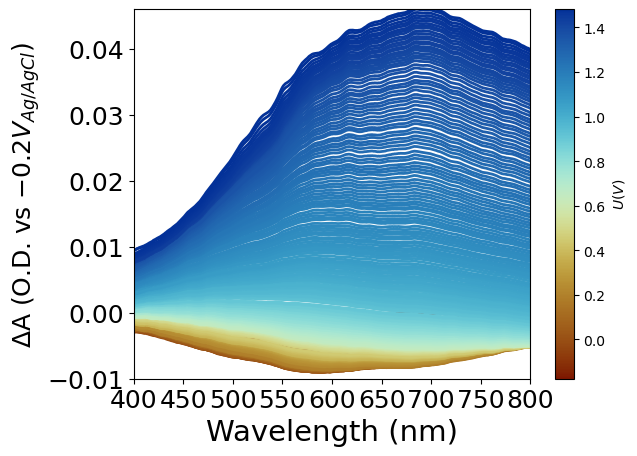

In [12]:
# use Spectral_voltages_corrected as the collumn names for the data

data_iR=data.copy(deep=True) 

data_iR.columns=Spectral_voltages_corrected

data_iR

# use plot_DOD to plot the data_iR

sp.plot_DOD(data_iR, y_max=0.046, y_min=-0.01, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ -0.2V_{Ag/AgCl}$)'>)

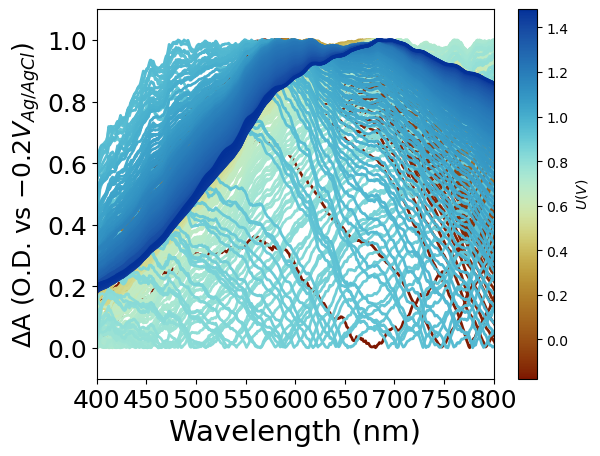

In [13]:

# normalise the data_iR

data_iR_norm=sp.normalise_DOD(data_iR.abs())

# plot the normalised data_iR

sp.plot_DOD(data_iR_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")



/var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/ipykernel_7137/3047782232.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
/var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/ipykernel_7137/3047782232.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
/var/folders/vm/d986p9hx0rlglk34b43v_h180000gn

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

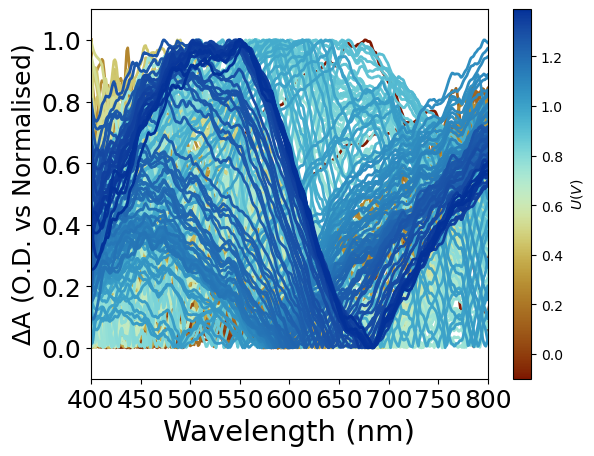

In [35]:
# loop though data_iR_norm and from collumn 20 to collumn n-20 
# subtract collumn 20 from collumn i-20, put this into a new dataframe called data_iR_norm_diff

step=20
data_iR_diff=pd.DataFrame()
for i in range(step, len(data_iR_norm.columns)-step):
    data_iR_diff[data_iR_norm.columns[i]]=data_iR_norm[data_iR_norm.columns[i]]-data_iR_norm[data_iR_norm.columns[i-20]]
    # apply a savinky golay filter to the data_iR_norm_diff using the function savgol_filter from scipy.signal
    data_iR_diff[data_iR_norm.columns[i]]=signal.savgol_filter(data_iR_diff[data_iR_norm.columns[i]], 5, 3)

    
# normalise the data_iR_diff

data_iR_diff_norm=sp.normalise_DOD(data_iR_diff.abs())


sp.plot_DOD(data_iR_diff_norm, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")




In [36]:
print(data_iR_diff_norm.columns.values[0], data_iR_diff_norm.columns.values[50], data_iR_diff_norm_U.columns.values[90])

-0.09923366278998248 0.14963286213906146 0.49934375361786254


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs Normalised)'>)

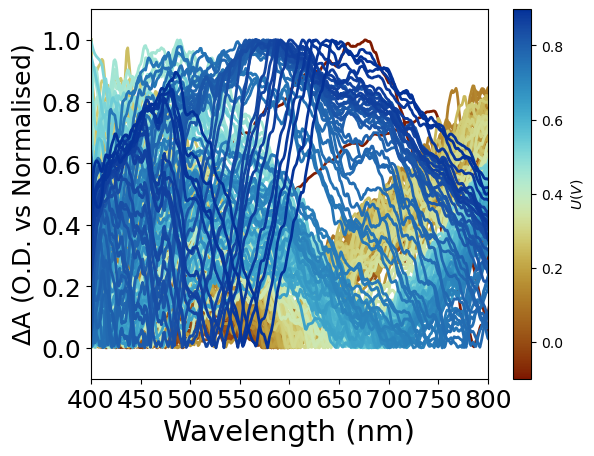

In [49]:
Ustart=data_iR_diff_norm.columns.values[0]
Uend=data_iR_diff_norm.columns.values[200]


# get the data between Ustart and Uend

data_iR_diff_norm_U=data_iR_diff_norm.loc[:, Ustart:Uend]

# plot the data_iR_diff_norm_U

sp.plot_DOD(data_iR_diff_norm_U, y_max=1.1, y_min=-0.1, x_min=400, x_max=800, reference_potential=f"Normalised")